In [17]:
import pandas as pd

In [18]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_excel('./boston.xls') #read the file

In [20]:
data.head() #peek top

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [21]:
data.tail() #peek bottom

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.0,391.989990,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.0,396.899994,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.899994,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.0,393.450012,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.800003,2.5050,1,273,21.0,396.899994,7.88,11.9


In [22]:
data.shape

(506, 14)

In [23]:
data.size #rows times columns

7084

In [24]:
#check for columns with missing values
def columnsWithMissingValues(df):
    return [cname for cname in df.columns if df[cname].isnull().any()]
columnsWithMissingValues(data)

[]

In [25]:
#confirm missing values
miss_col_values = pd.isnull(data).any()
miss_col_values

CRIM     False
ZN       False
INDUS    False
CHAS     False
NOX      False
RM       False
AGE      False
DIS      False
RAD      False
TAX      False
PT       False
B        False
LSTAT    False
MV       False
dtype: bool

In [27]:
#find column-wise sum of missing values
data.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


PEARSON CORRELATION
           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN    -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX    0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM    -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE    0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS   -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD    0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX    0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PT     0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355502  0.261515   
B     -0.385064  0.175520 -0.356

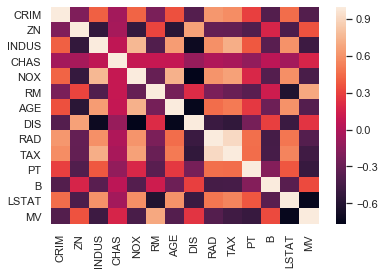

In [35]:
#check correlation between features
#pearson correlation
import seaborn as sns; sns.set()

print('PEARSON CORRELATION')
print(data.corr(method='pearson'))
sns.heatmap(data.corr(method='pearson'))
correlation_matrix = data.corr().round(2)

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

SPEARMAN CORRELATION
           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM   1.000000 -0.571660  0.735524  0.041537  0.821465 -0.309116  0.704140   
ZN    -0.571660  1.000000 -0.642811 -0.041937 -0.634828  0.361074 -0.544423   
INDUS  0.735524 -0.642811  1.000000  0.089841  0.791189 -0.415301  0.679487   
CHAS   0.041537 -0.041937  0.089841  1.000000  0.068426  0.058813  0.067792   
NOX    0.821465 -0.634828  0.791189  0.068426  1.000000 -0.310344  0.795153   
RM    -0.309116  0.361074 -0.415301  0.058813 -0.310344  1.000000 -0.278082   
AGE    0.704140 -0.544423  0.679487  0.067792  0.795153 -0.278082  1.000000   
DIS   -0.744986  0.614627 -0.757080 -0.080248 -0.880015  0.263168 -0.801610   
RAD    0.727807 -0.278767  0.455507  0.024579  0.586429 -0.107492  0.417983   
TAX    0.729045 -0.371394  0.664361 -0.044486  0.649527 -0.271898  0.526366   
PT     0.465283 -0.448475  0.433710 -0.136065  0.391309 -0.312923  0.355384   
B     -0.360555  0.163135 -0.28

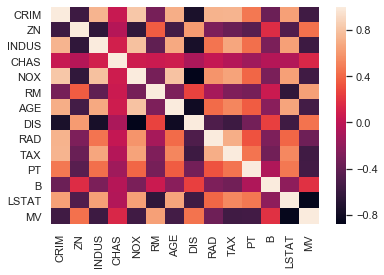

In [37]:
#spearman correlation
print('SPEARMAN CORRELATION')
print(data.corr(method='spearman'))
sns.heatmap(data.corr(method='spearman'))

KENDALL CORRELATION
           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM   1.000000 -0.462057  0.521014  0.033948  0.603361 -0.211718  0.497297   
ZN    -0.462057  1.000000 -0.535468 -0.039419 -0.511464  0.278134 -0.429389   
INDUS  0.521014 -0.535468  1.000000  0.075889  0.612030 -0.291318  0.489070   
CHAS   0.033948 -0.039419  0.075889  1.000000  0.056387  0.048080  0.055616   
NOX    0.603361 -0.511464  0.612030  0.056387  1.000000 -0.215633  0.589608   
RM    -0.211718  0.278134 -0.291318  0.048080 -0.215633  1.000000 -0.187611   
AGE    0.497297 -0.429389  0.489070  0.055616  0.589608 -0.187611  1.000000   
DIS   -0.539878  0.478524 -0.565137 -0.065619 -0.683930  0.179801 -0.609836   
RAD    0.563969 -0.234663  0.353967  0.021739  0.434828 -0.076569  0.306201   
TAX    0.544956 -0.289911  0.483228 -0.037655  0.453258 -0.190532  0.360311   
PT     0.312768 -0.361607  0.336612 -0.115694  0.278678 -0.223194  0.251857   
B     -0.264378  0.128177 -0.192

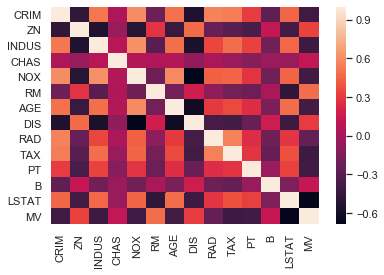

In [38]:
#kendall correlation
print('KENDALL CORRELATION')
print(data.corr(method='kendall'))
sns.heatmap(data.corr(method='kendall'))

In [43]:
#delete the target variable
X = data.drop('MV',axis = 1)
Y = data['MV']

In [45]:
import sklearn 
from sklearn.feature_selection import rfe
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [46]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

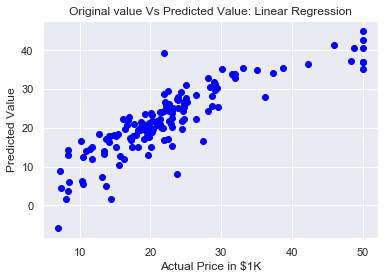

In [47]:
plt.scatter(Y_test,Y_pred,c = 'blue')
plt.xlabel('Actual Price in $1K')
plt.ylabel('Predicted Value')
plt.title('Original value Vs Predicted Value: Linear Regression')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  22.95288997006361
